In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")

from Q_learning_function_qiyun import qiyun_softmax,generate_action,generate_action_reverse,generate_action_uncertain_update



### uncertain 阶段的真实实验数据

In [2]:
df_path_uncertain = [r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\uncertain1.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\uncertain2.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\uncertain3.csv',
           r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\uncertain4.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\uncertain5.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\uncertain6.csv']

df_path_reverse = [r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\reverse1.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\reverse2.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\reverse3.csv',
           r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\reverse4.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\reverse5.csv']

# 请注意根据读入文件路径列表的不同，相同的变量中存的信息不同
df_path = df_path_uncertain      # 选择不同的阶段

uncertain_Ori_data = []
for i in range (len(df_path)):
    df1 = pd.read_csv(df_path[i])
    dff = df1[df1['stimulus'] == 1]
    # 根据条件新增一列'action'
    dff['action'] = 'lick'

    # 使用条件索引和逻辑判断，将'action'列中outcome为1和5的行设置为'lick'

    # uncertain 阶段
    dff.loc[(dff['outcome'] == 1) | (dff['outcome'] == 5), 'action'] = 'lick'
    dff.loc[dff['outcome'] == 2, 'action'] = 'nolick'

    # reverse 阶段
    # dff.loc[(dff['outcome'] == 4), 'action'] = 'lick'
    # dff.loc[dff['outcome'] == 3, 'action'] = 'nolick'

    dff.reset_index(drop=True,inplace=True)
    uncertain_Ori_data.append(dff)

# print(len(uncertain_Ori_data))
Ori = []
for b in range(len(uncertain_Ori_data)):
    dg = uncertain_Ori_data[b]
    Ori_1 = list(dg['action'])
    Ori.append(Ori_1)
    print(len(Ori_1))

# Ori[0]
# Ori[4].count('lick')

50
45
45
56
40
45


### uncertain阶段根据小鼠真实数据生成的Q值以及P值数据

In [3]:
dh_path_uncertain = [r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_uncertain_mice1.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_uncertain_mice2.csv',
           r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_uncertain_mice3.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_uncertain_mice4.csv',
           r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_uncertain_mice5.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_uncertain_mice6.csv']

# dh_path_uncertain = [r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_uncertain_mice1.csv']

dh_path_reverse = [r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_reverse_mice1.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_reverse_mice2.csv',
           r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_reverse_mice3.csv',r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_reverse_mice4.csv',
           r'E:\project_wuqiyun\Pyddm_wuqiyun\Q_learning\RL_QandP_data_qiyun\qiyun_reverse_mice5.csv']

# 根据实验阶段选择读取文件路径
dh_path = dh_path_uncertain

dh_P = []
dh_Q = []
for c in range(len(dh_path)):
    dh = pd.read_csv(dh_path[c])
    dh1 = list(dh['lick_P'])
    dh11 = list(dh['Lick_Q'])
    dh_P.append(dh1)
    dh_Q.append(dh11)

print(len(dh_P))
# dh_Q[1]

6


### uncertain and reverse阶段的模拟数据

In [4]:
dda = []
dda_Q = []
generate_data_list = []         # 用于存储生成数据的列表，每一个为一个模拟动作序列的dataframe
iter_num = 30000              # 生成模拟行为数据的总次数

for m in range(iter_num):

    data = generate_action(0.98,0.027,48,0.1,0)       # uncertain 阶段生成的数据
    # data = generate_action_reverse(0.98,0.027,48,0.8,0)       # reverse 阶段生成的数据

    # 如果是uncertain阶段就会有RO,reverse 阶段注释掉
    # data.loc[data['Action']=='RO','Action'] = 'lick'        # 将RO 替换为lick
    data.loc[data['Action']=='Lick','Action'] = 'lick'        # 将RO 替换为lick
    data.loc[data['Action']=='NoLick','Action'] = 'nolick'    # 将RO 替换为lick
    data['iter_num'] = m+1                                    # 将生成的数据记录迭代编号

    # 将生成的模拟行为数据存储到列表中
    da = list(data['Action'])
    da_Q = list(data['Lick Q'])

    generate_data_list.append(data)
    dda.append(da)
    dda_Q.append(da_Q)
    # print(f'>>>>>>>>>>>>>>>>>>>>>当前进度 {m}/{iter_num} <<<<<<<<<<<<<<<<<<<<<<<<<')
# dda[0]
# print(dda_Q[0])

In [5]:
generate_data_list[0]

,Lick Q,NoLick Q,Lick Probability,NoLick Probability,Action,Alpha,PE,iter_num
0,0.980000,0.027000,0.945782,0.054218,RO,0.100000,0.000000,1
1,0.821888,0.027000,0.915650,0.084350,lick,0.146400,-1.080000,1
2,0.840071,0.027000,0.919769,0.080231,lick,0.102089,0.178112,1
3,0.851914,0.027000,0.922352,0.077648,lick,0.074048,0.159929,1
4,0.860247,0.027000,0.924124,0.075876,RO,0.056276,0.148086,1
5,0.754058,0.027000,0.898546,0.101454,lick,0.110585,-0.960247,1
6,0.775216,0.027000,0.904188,0.095812,RO,0.086026,0.245942,1
7,0.668761,0.027000,0.872726,0.127274,RO,0.121633,-0.875216,1
8,0.565377,0.027000,0.834123,0.165877,lick,0.134481,-0.768761,1
9,0.615558,0.027000,0.853919,0.146081,lick,0.115458,0.434623,1


### 将模拟生成的数据保存到本地

In [6]:
df_init = generate_data_list[0]

for tab_num in range(1,len(generate_data_list)):
    df_init = pd.concat([df_init,generate_data_list[tab_num]])

# df_init.to_csv(r'E:\project_wuqiyun\Pyddm_wuqiyun\RL_SARSA_Q_data_update_qiyun\generate_data\reverse\qiyun_generate_reverse_data.csv')      # reverse阶段输出路径
df_init.to_csv(r'E:\project_wuqiyun\Pyddm_wuqiyun\RL_SARSA_Q_data_update_qiyun\generate_data\uncertain\qiyun_generate_uncertain_data.csv')    # uncertain阶段输出路径


In [7]:
# 调试用的代码
# for k in range(3):
#     tn = len(dda_Q[k])//3
#     print(sum(dda_Q[k][:tn])/tn)
#     print(sum(dda_Q[k][tn:2*tn])/tn)
#     print(sum(dda_Q[k][2*tn:3*tn])/tn)

### 模拟数据和实验数据一致性分析

In [8]:
# # 分子阶段分析方法
# split_point = 3 # 设置划分阶段的个数
# split_num = len(dda[0])// split_point
# # 按比例划分
# r1,r2,r3  = 0.15,0.35,0.50  # 设置三阶段分割比例          

# P_Table = []
# Q_Table = []
# for iter_n in range(iter_num):
#     P_point = []
#     Q_point = []
#     # 选三等分
#     # for q in range(split_point):
#     #     lick_num = (dda[iter_n][split_num*q:split_num*(q+1)]).count('lick')
#     #     P = lick_num/split_num
#     #     P_point.append(P)

#     #     split_num11 = len(dda_Q[iter_n])//split_point
#     #     lick_num11 = np.sum(dda_Q[iter_n][split_num*q:split_num*(q+1)])
#     #     d_Q = lick_num11/split_num11
#     #     Q_point.append(d_Q)

#     for q in range(split_point):
       
#         n0, n1, n2, n3 = 0,int(len(dda[iter_n])*(r1)),int(len(dda[iter_n])*(r1+r2)),int(len(dda[iter_n])*(r1+r2+r3))
#         split_point_list = [n0, n1, n2, n3]
#         lick_num = (dda[iter_n][split_point_list[q]:split_point_list[q+1]]).count('lick')
#         split_ratio_num = [int(len(dda[iter_n])*(r1)),int(len(dda[iter_n])*(r2)),int(len(dda[iter_n])*(r3))]
#         P = lick_num/split_ratio_num[q]
#         P_point.append(P)

#         lick_num11 = np.sum(dda_Q[iter_n][split_point_list[q]:split_point_list[q+1]])
#         d_Q = lick_num11/split_ratio_num[q]
#         Q_point.append(d_Q)

#     P_Table.append(P_point)
#     Q_Table.append(Q_point)
# # 三阶段
# P_Table = pd.DataFrame(P_Table,columns=['first_P','second_P','third_P'])
# Q_Table = pd.DataFrame(Q_Table,columns=['first_Q','second_Q','third_Q'])
# # 四阶段
# # P_Table = pd.DataFrame(P_Table,columns=['first_P','second_P','third_P','fouth_P'])
# # Q_Table = pd.DataFrame(P_Table,columns=['first_Q','second_Q','third_Q','fouth_Q'])


# P_mean = P_Table.mean()
# print('模型生成数据lick三子阶段概率均值:\n')
# print(P_mean,'\n')

# # ===========================================Q值转换真实数据=========================================
# dh_p_table = []
# dh_q_table = []

# for z in range(len(dh_P)):
#     dh_PP = []
#     dh_QQ = []
#     # 等比例分三阶段
#     # for p in range(split_point):
#     #     split_num2 = len(dh_P[z])//split_point
#     #     lick_num2 = np.sum(dh_P[z][split_num2*p:split_num2*(p+1)])
#     #     d_P = lick_num2/split_num2

#     #     split_num22 = len(dh_Q[z])//split_point
#     #     lick_num22 = np.sum(dh_Q[z][split_num2*p:split_num2*(p+1)])
#     #     d_Q = lick_num22/split_num22
#     # 按比例分三阶段
#     for p in range(split_point):

#         n0, n1, n2, n3 = 0,int(len(dh_P[z])*(r1)),int(len(dh_P[z])*(r1+r2)),int(len(dh_P[z])*(r1+r2+r3))
#         split_point_list = [n0, n1, n2, n3]

#         lick_numsp2 = np.sum(dh_P[z][split_point_list[p]:split_point_list[p+1]])
#         d_P = lick_num11/split_ratio_num[p]
#         P_point.append(d_P)
        
#         lick_numsq2 = np.sum(dh_Q[z][split_point_list[p]:split_point_list[p+1]])
#         d_Q = lick_num11/split_ratio_num[p]
#         Q_point.append(d_Q)

#         dh_PP.append(d_P)
#         dh_QQ.append(d_Q)
#     dh_p_table.append(dh_PP)
#     dh_q_table.append(dh_QQ)
# # 三阶段
# dh_p_table = pd.DataFrame(dh_p_table,columns=['dh_first_lick_P','dh_second_lick_P','dh_third_lick_P'])
# dh_q_table = pd.DataFrame(dh_q_table,columns=['dh_first_lick_Q','dh_second_lick_Q','dh_third_lick_Q'])
# # 四阶段
# # dh_p_table = pd.DataFrame(dh_p_table,columns=['dh_first_lick_P','dh_second_lick_P','dh_third_lick_P','dh_fouth_lick_P'])
# # dh_q_table = pd.DataFrame(dh_q_table,columns=['dh_first_lick_Q','dh_second_lick_Q','dh_third_lick_Q','dh_fouth_lick_Q'])

# # ori_p_table = pd.DataFrame(ori_p_table,columns=['ori_first_lick_P','ori_second_lick_P','ori_third_lick_P','ori_fouth_lick_P'])

# dh_P_mean = dh_p_table.mean()
# print('所有老鼠行为数据经Q值转换lick三子阶段概率均值:\n')
# print(dh_P_mean,'\n')
# # ==============================================================================================================
# ori_p_table = []
# for t in range(len(Ori)):
#     Ori_PP = []
#     for p in range(split_point):
#         # 三个阶段等分
#         # split_num1 = len(Ori[t])//split_point
#         # lick_num1 = (Ori[t][split_num1*p:split_num1*(p+1)]).count('lick')
#         # # print(lick_num1)
#         # Ori_P = lick_num1/split_num1
#         # 按比例划分三个阶段

#         n0, n1, n2, n3 = 0,int(len(Ori[t])*(r1)),int(len(Ori[t])*(r1+r2)),int(len(Ori[t])*(r1+r2+r3))
#         split_point_list = [n0, n1, n2, n3]
#         lick_num = (dda[iter_n][split_point_list[p]:split_point_list[p+1]]).count('lick')
#         split_ratio_num = [int(len(Ori[t])*(r1)),int(len(Ori[t])*(r2)),int(len(Ori[t])*(r3))]
#         Ori_P = lick_num/split_ratio_num[p]

#         Ori_PP.append(Ori_P)
#     ori_p_table.append(Ori_PP)
# # 三阶段
# ori_p_table = pd.DataFrame(ori_p_table,columns=['ori_first_lick_P','ori_second_lick_P','ori_third_lick_P'])
# # 四阶段
# # ori_p_table = pd.DataFrame(ori_p_table,columns=['ori_first_lick_P','ori_second_lick_P','ori_third_lick_P','ori_fouth_lick_P'])

# Ori_P_mean = ori_p_table.mean()
# print('所有老鼠行为数据lick三子阶段概率均值:\n')
# print(Ori_P_mean,'\n')
# print('所有老鼠行为数据lick三子阶段概率:\n')
# ori_p_table

In [9]:
# 分子阶段分析方法
split_point = 3 # 设置划分阶段的个数
split_num = len(dda[0])// split_point

r1,r2,r3  = 0.20,0.30,0.50  # 设置三阶段分割比例 

P_Table = []
Q_Table = []

for iter_n in range(iter_num):
    P_point = []
    Q_point = []
    # 选三等分
    for q in range(split_point):
        lick_num = (dda[iter_n][split_num*q:split_num*(q+1)]).count('lick')+(dda[iter_n][split_num*q:split_num*(q+1)]).count('RO')
        P = lick_num/split_num
        P_point.append(P)

        split_num11 = len(dda_Q[iter_n])//split_point
        lick_num11 = np.sum(dda_Q[iter_n][split_num*q:split_num*(q+1)])
        d_Q = lick_num11/split_num11
        Q_point.append(d_Q)
    # 按比例划分三个阶段
    # for q in range(split_point):

    #     n0, n1, n2, n3 = 0,int(len(dda[iter_n])*(r1)),int(len(dda[iter_n])*(r1+r2)),int(len(dda[iter_n])*(r1+r2+r3))
    #     split_point_list = [n0, n1, n2, n3]
    #     lick_num = (dda[iter_n][split_point_list[q]:split_point_list[q+1]]).count('lick')
    #     split_ratio_num = [int(len(dda[iter_n])*(r1)),int(len(dda[iter_n])*(r2)),int(len(dda[iter_n])*(r3))]
    #     P = lick_num/split_ratio_num[q]
    #     P_point.append(P)

    #     lick_num11 = np.sum(dda_Q[iter_n][split_point_list[q]:split_point_list[q+1]])
    #     d_Q = lick_num11/split_ratio_num[q]
    #     Q_point.append(d_Q)

    P_Table.append(P_point)
    Q_Table.append(Q_point)
# 三阶段
P_Table = pd.DataFrame(P_Table,columns=['first_P','second_P','third_P'])
Q_Table = pd.DataFrame(Q_Table,columns=['first_Q','second_Q','third_Q'])

Q_mean = Q_Table.mean()
print('模型生成数据lick三子阶段Q均值:\n')
print(Q_mean,'\n')

# ===========================================Q值转换真实数据=========================================
dh_p_table = []
dh_q_table = []

for z in range(len(dh_P)):
    dh_PP = []
    dh_QQ = []
    # 等比例分三阶段
    for p in range(split_point):
        split_num2 = len(dh_P[z])//split_point
        lick_num2 = np.sum(dh_P[z][split_num2*p:split_num2*(p+1)])
        d_P = lick_num2/split_num2
        dh_PP.append(d_P)
        
        split_num22 = len(dh_Q[z])//split_point
        lick_num22 = np.sum(dh_Q[z][split_num2*p:split_num2*(p+1)])
        d_Q = lick_num22/split_num22
        dh_QQ.append(d_Q)

    # 按比例分三阶段
    # for p in range(split_point):

    #     n0, n1, n2, n3 = 0,int(len(dh_P[z])*(r1)),int(len(dh_P[z])*(r1+r2)),int(len(dh_P[z])*(r1+r2+r3))
    #     split_point_list = [n0, n1, n2, n3]
    #     split_ratio_num = [int(len(dh_P[z])*(r1)),int(len(dh_P[z])*(r2)),int(len(dh_P[z])*(r3))]
    #     lick_num11 = np.sum(dh_P[z][split_point_list[p]:split_point_list[p+1]])
    #     d_P = lick_num11/split_ratio_num[p]
    #     dh_PP.append(d_P)

    #     lick_num22 = np.sum(dh_Q[z][split_point_list[p]:split_point_list[p+1]])
    #     d_Q = lick_num22/split_ratio_num[p]
    #     dh_QQ.append(d_Q)

    dh_p_table.append(dh_PP)
    dh_q_table.append(dh_QQ)
# 三阶段
dh_p_table = pd.DataFrame(dh_p_table,columns=['dh_first_lick_P','dh_second_lick_P','dh_third_lick_P'])
dh_q_table = pd.DataFrame(dh_q_table,columns=['dh_first_lick_Q','dh_second_lick_Q','dh_third_lick_Q'])

dh_Q_mean = dh_q_table.mean()
print('所有老鼠行为数据经Q值三子阶段均值:\n')
print(dh_Q_mean,'\n')
# ==============================================================================================================
# ori_p_table = []
# for t in range(len(Ori)):
#     Ori_PP = []
#     for p in range(split_point):
#         # 三阶段等分
#         # split_num1 = len(Ori[t])//split_point
#         # lick_num1 = (Ori[t][split_num1*p:split_num1*(p+1)]).count('lick')
#         # # print(lick_num1)
#         # Ori_P = lick_num1/split_num1
#         # Ori_PP.append(Ori_P)
#         # 按比例划分三阶段

#         n0, n1, n2, n3 = 0,int(len(Ori[t])*(r1)),int(len(Ori[t])*(r1+r2)),int(len(Ori[t])*(r1+r2+r3))
#         split_point_list = [n0, n1, n2, n3]
#         lick_num = (Ori[t][split_point_list[p]:split_point_list[p+1]]).count('lick')
#         split_ratio_num = [int(len(Ori[t])*(r1)),int(len(Ori[t])*(r2)),int(len(Ori[t])*(r3))]
#         Ori_P = lick_num/split_ratio_num[p]
#         Ori_PP.append(Ori_P)

#     ori_p_table.append(Ori_PP)
# # 三阶段
# ori_p_table = pd.DataFrame(ori_p_table,columns=['ori_first_lick_P','ori_second_lick_P','ori_third_lick_P'])
# # 四阶段
# # ori_p_table = pd.DataFrame(ori_p_table,columns=['ori_first_lick_P','ori_second_lick_P','ori_third_lick_P','ori_fouth_lick_P'])

# Ori_P_mean = ori_p_table.mean()
# print('所有老鼠行为数据lick三子阶段概率均值:\n')
# print(Ori_P_mean,'\n')
# print('所有老鼠行为数据lick三子阶段概率:\n')
# ori_p_table

模型生成数据lick三子阶段Q均值:

first_Q     0.855962
second_Q    0.739361
third_Q     0.708739
dtype: float64 

所有老鼠行为数据经Q值三子阶段均值:

dh_first_lick_Q     0.840981
dh_second_lick_Q    0.692650
dh_third_lick_Q     0.673874
dtype: float64 



In [10]:
# dh_q_table
# Q_Table

### Q值比较绘图

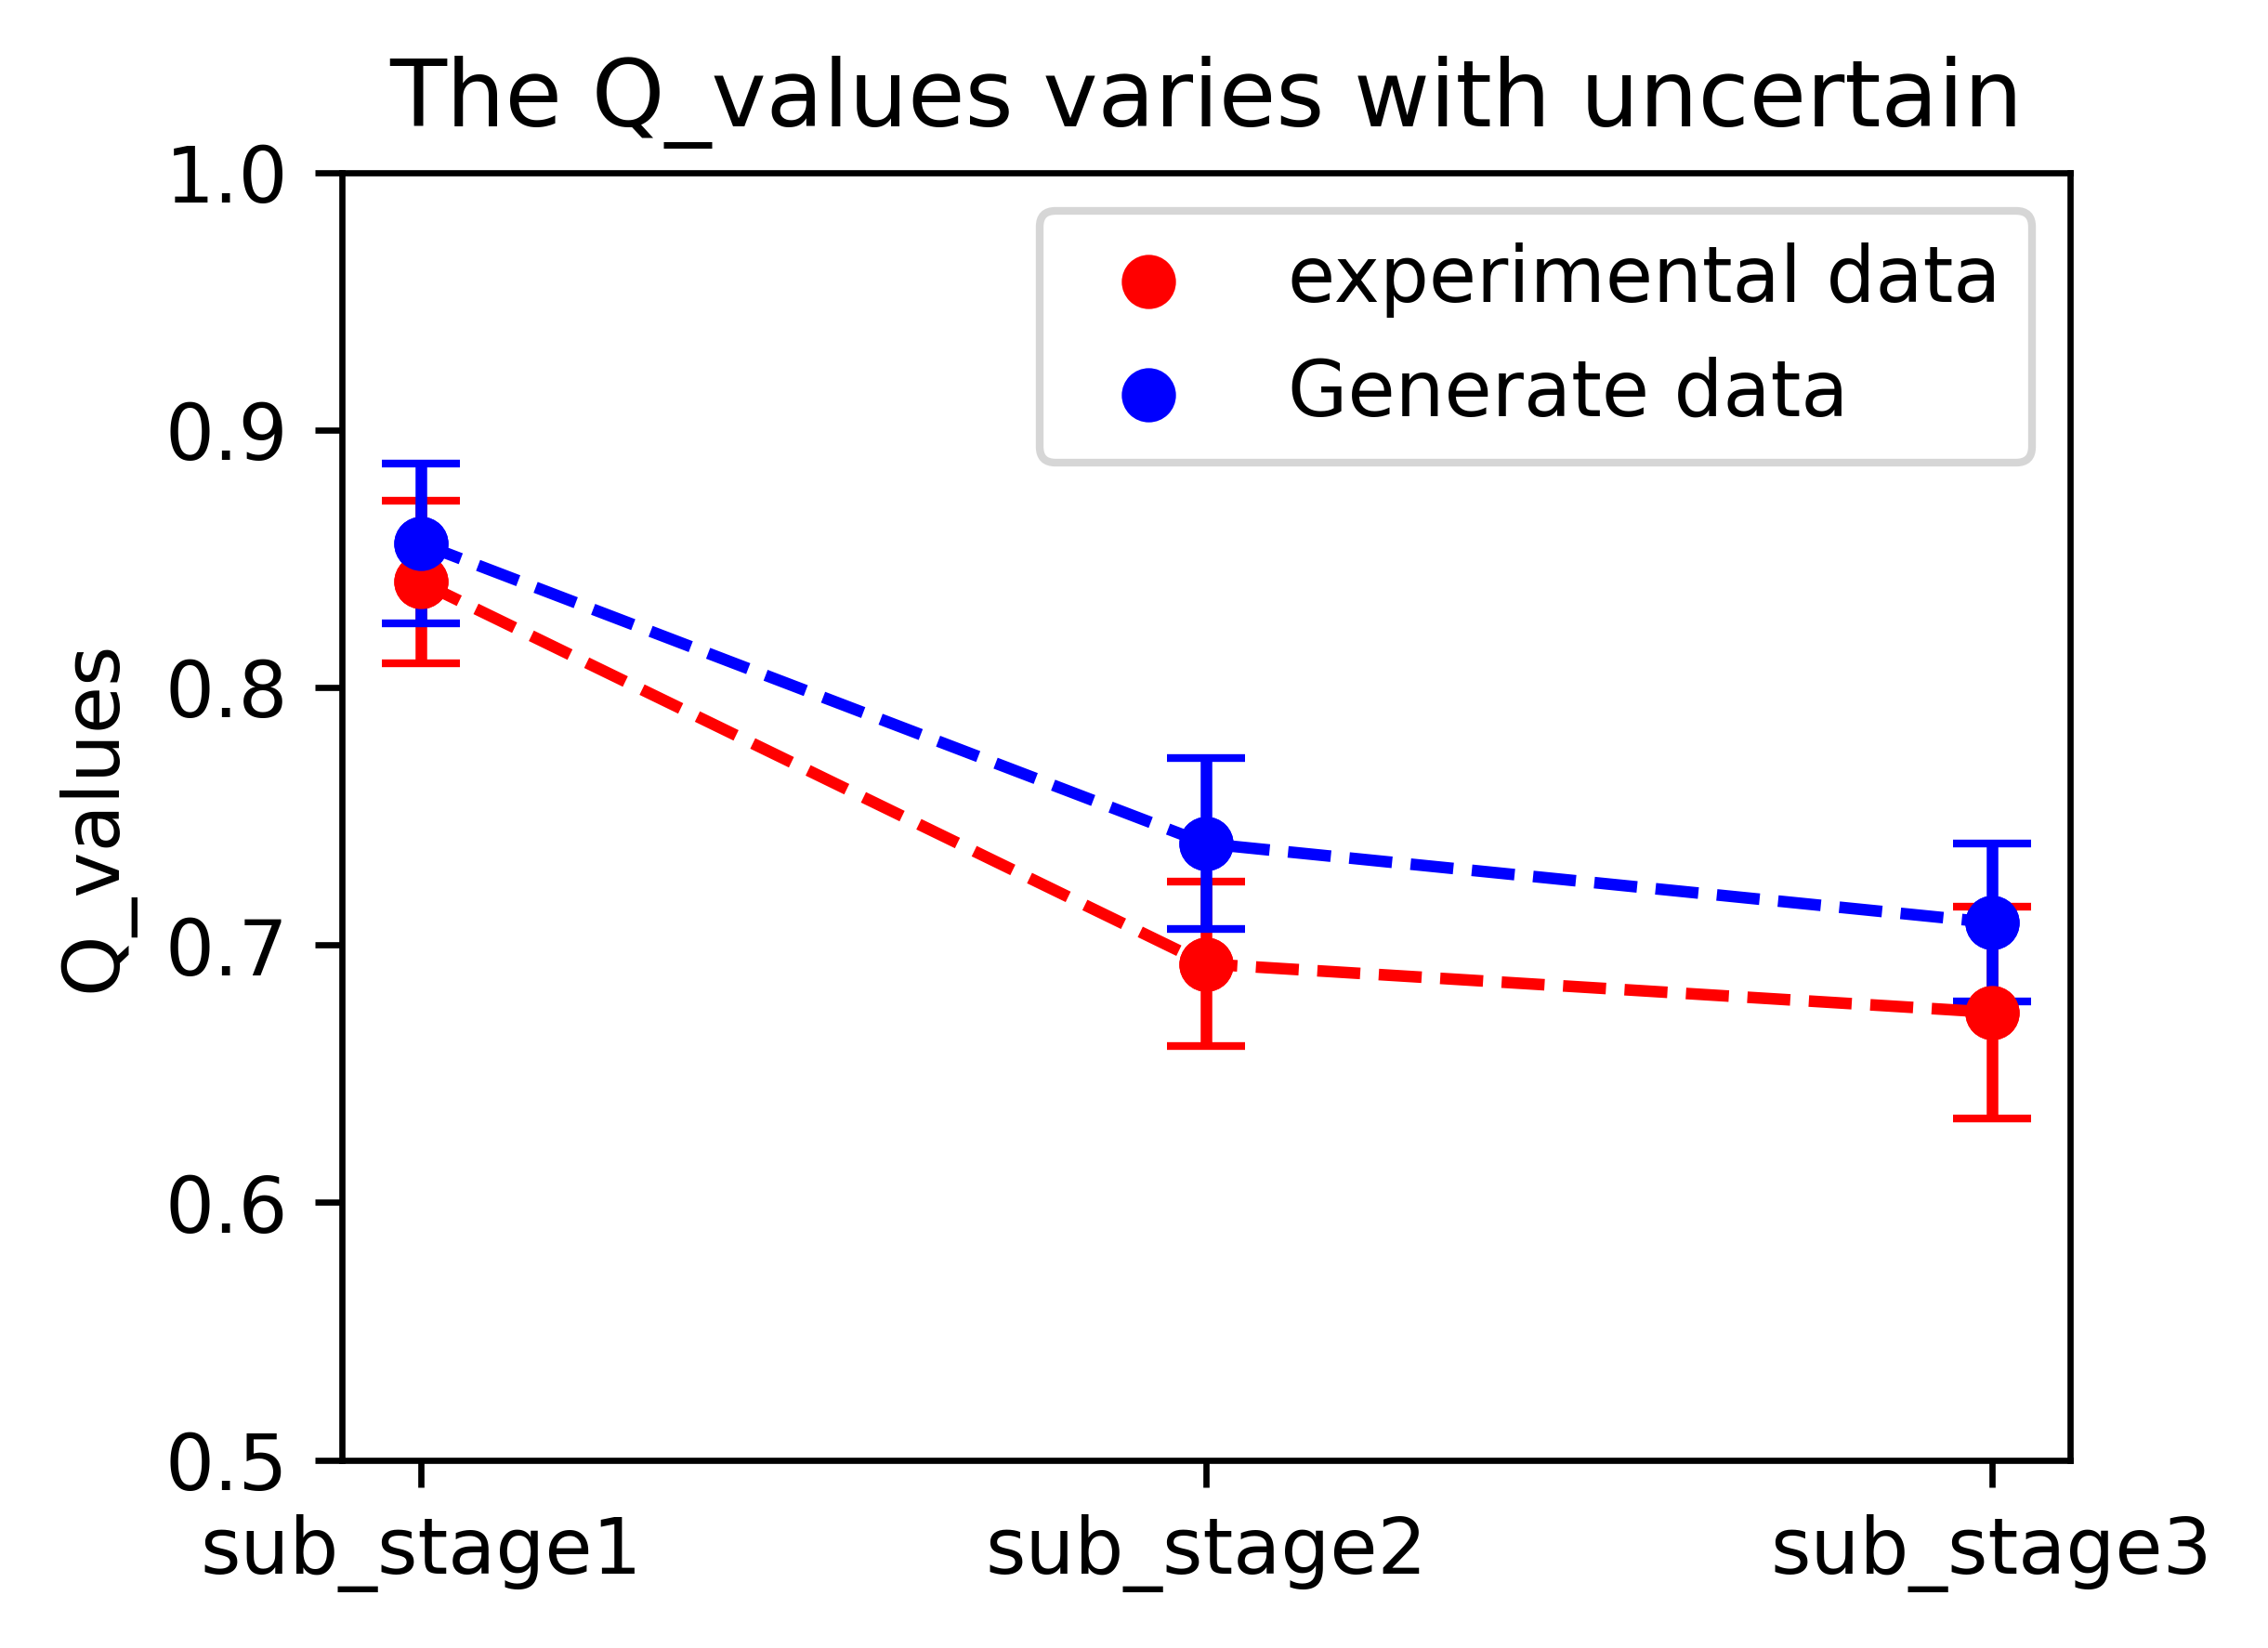

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
# ori_p_table.columns=['sub_stage1','sub_stage2','sub_stage3']
# df1 = ori_p_table
dh_q_table.columns=['sub_stage1','sub_stage2','sub_stage3']
df2 = dh_q_table
Q_Table.columns=['sub_stage1','sub_stage2','sub_stage3']
df3 = Q_Table

# 计算均值和标准误差
# mean_values = [df.mean() for df in [df1, df2, df3]]
# std_values = [df.std() for df in [df1, df2, df3]]

mean_values = [df.mean() for df in [df2, df3]]
std_values = [df.std() for df in [df2, df3]]
sample_size = len(df2)
errors = [std / np.sqrt(sample_size) for std in std_values]

# 设置颜色和标签
# colors = ['red', 'green', 'blue']
# labels = ['Real data', 'Probability of Q-value conversion in experimental data', 'Generate data']

colors = ['red',  'blue']
labels = ['experimental data', 'Generate data']

# 绘制散点图和误差线
# fig, ax = plt.subplots(figsize = (5,3),dpi=800)
fig, ax = plt.subplots(figsize = (4,3),dpi=600)


for i in range(len(mean_values)):
    ax.scatter(range(len(mean_values[i])), mean_values[i], marker='o', color=colors[i], label=labels[i])
    ax.errorbar(range(len(mean_values[i])), mean_values[i], yerr=errors[i], fmt='o', capsize=5, color=colors[i])

# 添加连接线
for i in range(len(mean_values)):
    ax.plot(range(len(mean_values[i])), mean_values[i], color=colors[i], linestyle='--')

# 设置图表标题和坐标轴标签
plt.title('The Q_values varies with uncertain')
ax.set_xticks(range(len(mean_values[0])))
ax.set_xticklabels(mean_values[0].index)
ax.set_ylim(0.5, 1.0)
# ax.set_ylim(-0.8, 0.1)

# plt.xlabel('Columns')
plt.ylabel('Q_values')

# 显示图例
plt.legend()
# plt.grid()

# 显示图表
plt.show()

### P值绘图比较

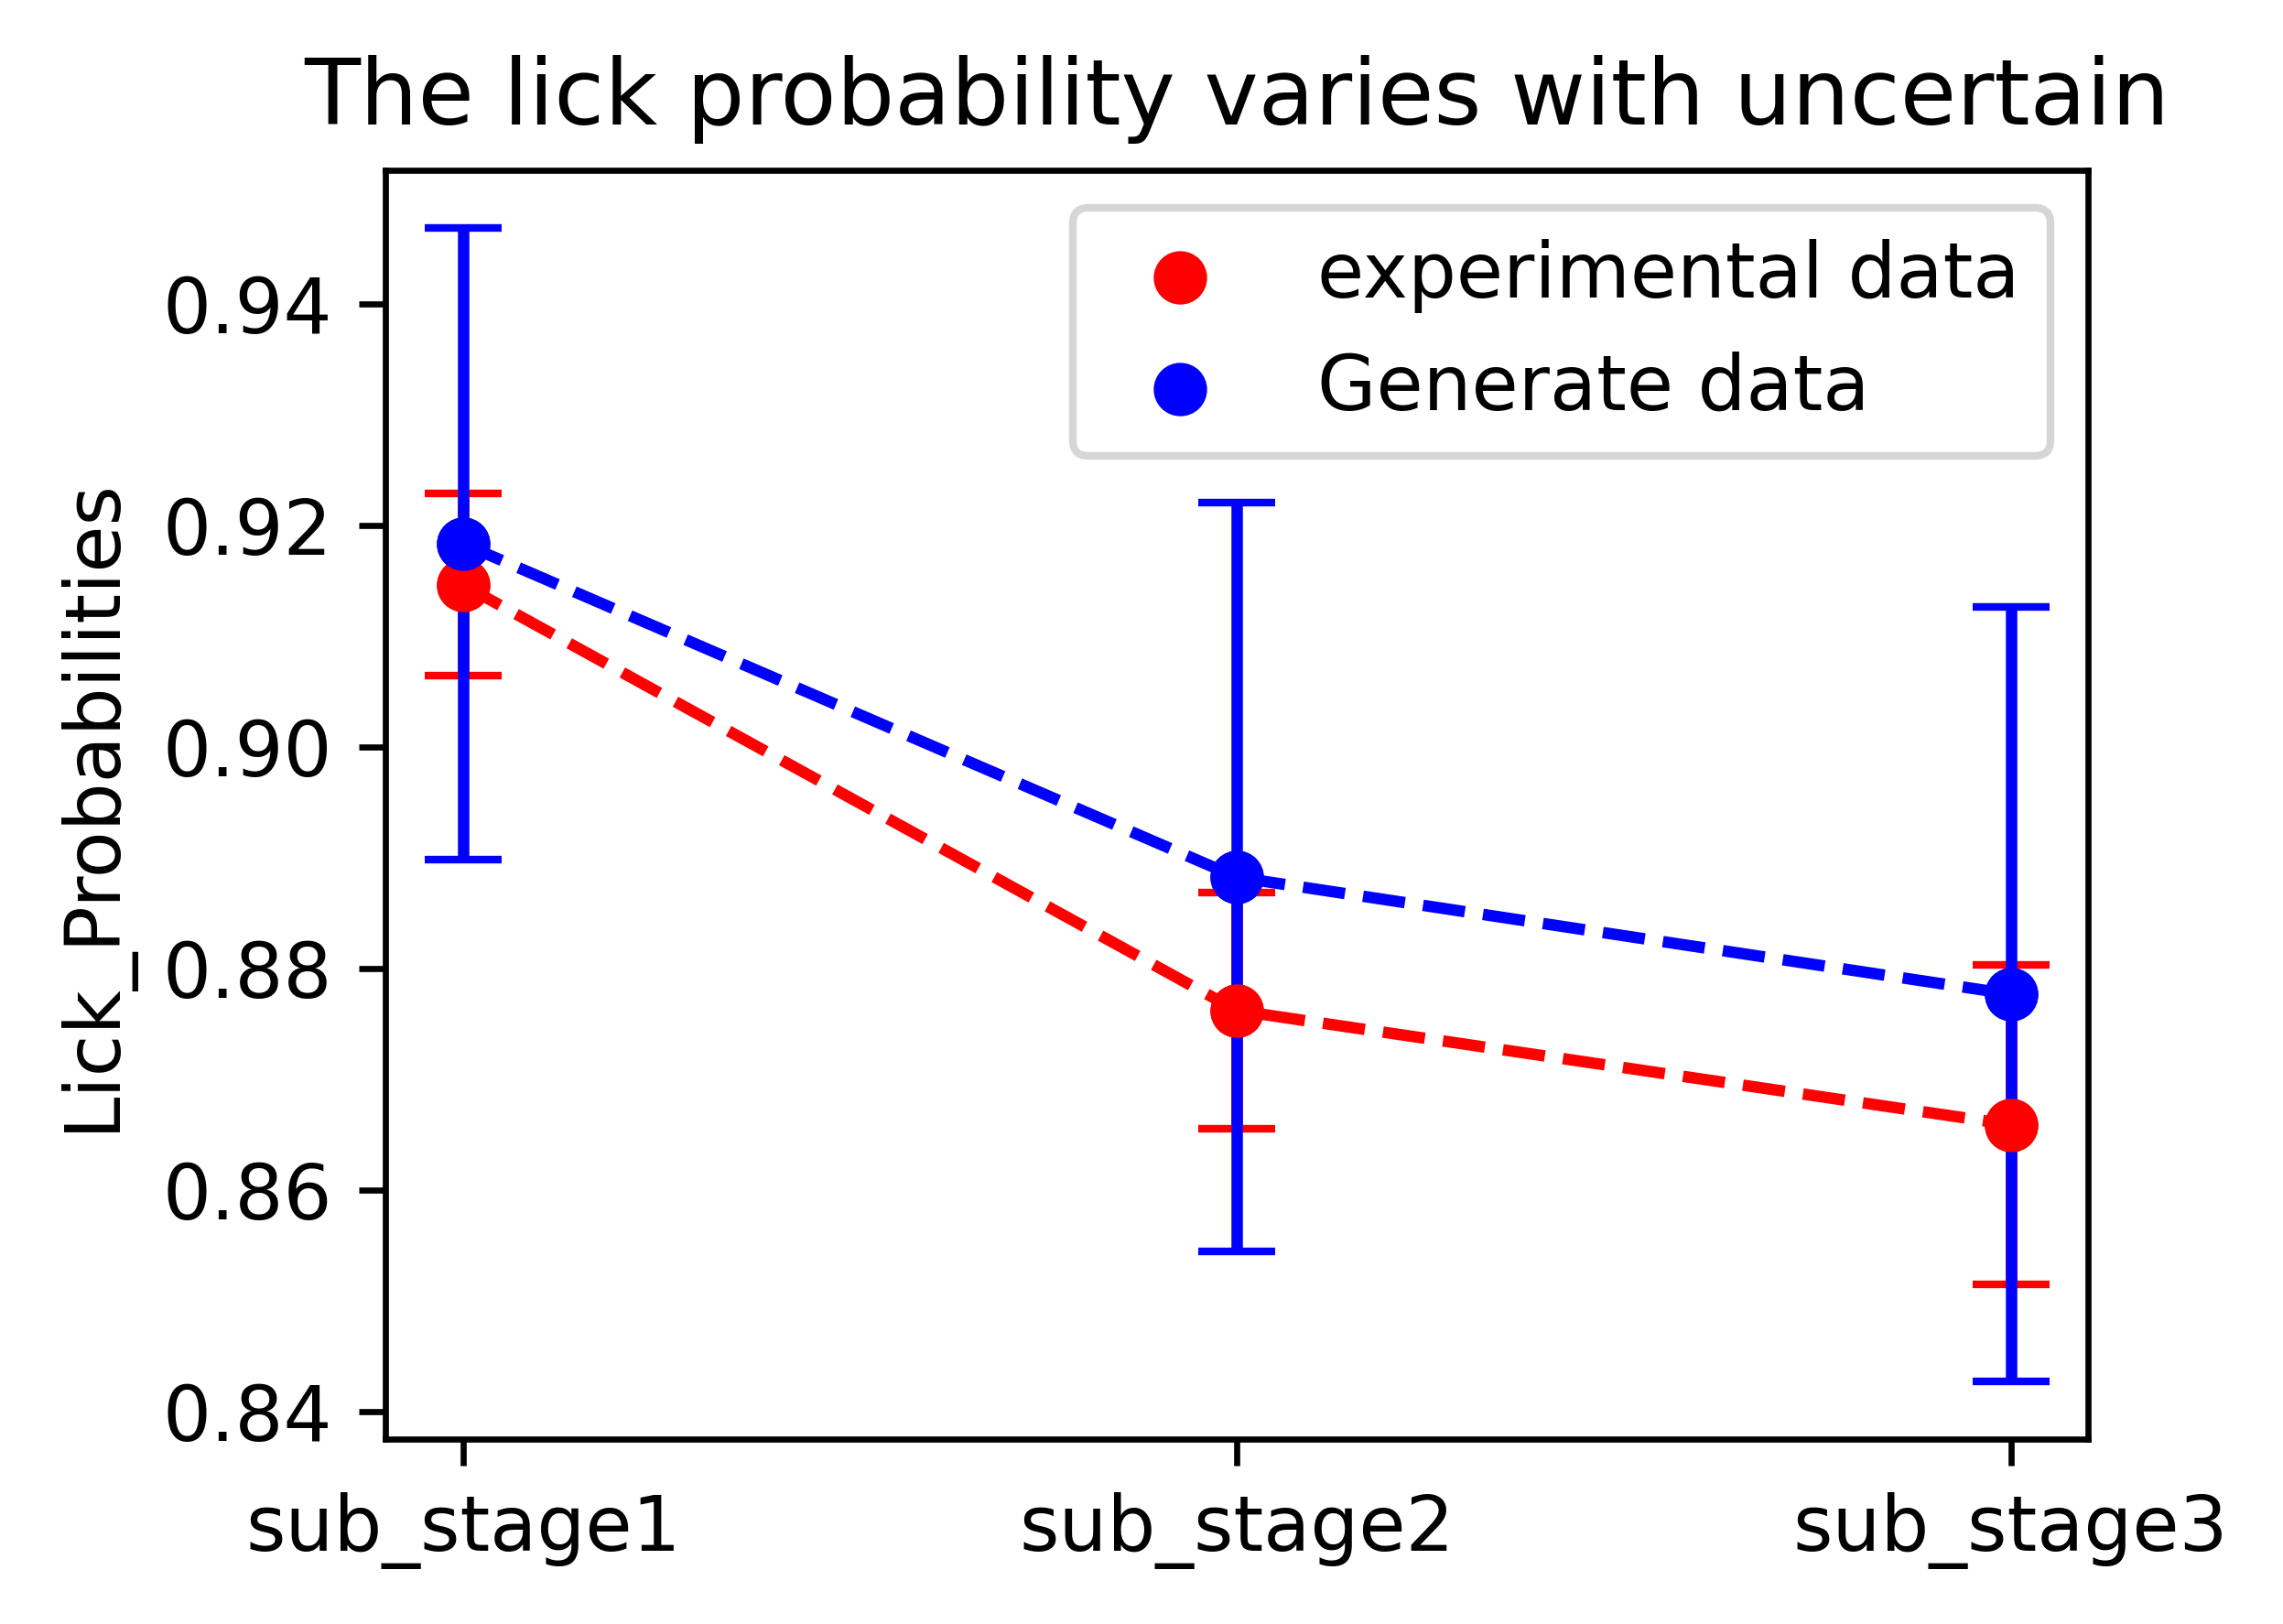

In [12]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # 示例数据
# # ori_p_table.columns=['sub_stage1','sub_stage2','sub_stage3']
# # df1 = ori_p_table
# dh_p_table.columns=['sub_stage1','sub_stage2','sub_stage3']
# df2 = dh_p_table
# P_Table.columns=['sub_stage1','sub_stage2','sub_stage3']
# df3 = P_Table

# # 计算均值和标准误差
# # mean_values = [df.mean() for df in [df1, df2, df3]]
# # std_values = [df.std() for df in [df1, df2, df3]]

# mean_values = [df.mean() for df in [df2, df3]]
# std_values = [df.std() for df in [df2, df3]]
# sample_size = len(df2)
# errors = [std / np.sqrt(sample_size) for std in std_values]

# # 设置颜色和标签
# # colors = ['red', 'green', 'blue']
# # labels = ['Real data', 'Probability of Q-value conversion in experimental data', 'Generate data']

# colors = ['red',  'blue']
# labels = ['experimental data', 'Generate data']

# # 绘制散点图和误差线
# # fig, ax = plt.subplots(figsize=(6,4),dpi=800)
# fig, ax = plt.subplots(figsize=(4,3),dpi=600)


# for i in range(len(mean_values)):
#     ax.scatter(range(len(mean_values[i])), mean_values[i], marker='o', color=colors[i], label=labels[i])
#     ax.errorbar(range(len(mean_values[i])), mean_values[i], yerr=errors[i], fmt='o', capsize=5, color=colors[i])

# # 添加连接线
# for i in range(len(mean_values)):
#     ax.plot(range(len(mean_values[i])), mean_values[i], color=colors[i], linestyle='--')

# # 设置图表标题和坐标轴标签
# plt.title('The lick probability varies with uncertain')
# ax.set_xticks(range(len(mean_values[0])))
# ax.set_xticklabels(mean_values[0].index)
# # ax.set_ylim(.8, 1)
# # ax.set_yticks([0.8,0.85,0.9,0.95])
# # plt.xlabel('Columns')
# plt.ylabel('Lick_Probabilities')

# # 显示图例
# plt.legend()
# # plt.grid()

# # 显示图表
# plt.show()

### 子阶段Q值显著性检验

In [13]:
dh_q_table          #实验真实数据的三阶段Q值
Q_Table           #生成数据的三阶段的Q值均值

,sub_stage1,sub_stage2,sub_stage3
0,0.751101,0.775945,0.721558
1,0.779053,0.699709,0.686953
2,0.925265,0.795645,0.706903
3,0.890143,0.760853,0.750805
4,0.893300,0.685879,0.559271
...,...,...,...
29995,0.783699,0.751023,0.606337
29996,0.945995,0.755169,0.719380
29997,0.737236,0.676469,0.659697
29998,0.741341,0.677707,0.680524


In [14]:
# 模型生成数据lick三子阶段Q均值:

# first_Q     1.044588
# second_Q    0.994050
# third_Q     0.980571
# dtype: float64 

# 所有老鼠行为数据经Q值三子阶段均值:

# dh_first_lick_Q     0.992581
# dh_second_lick_Q    0.870456
# dh_third_lick_Q     0.861599
# Q_mean[0]

In [26]:
from scipy.stats import ranksums

# 假设实验数据存储在experiment_data中，模拟数据存储在simulation_data中，每个数组的长度相同
experiment_data = dh_q_table['sub_stage1']
simulation_data = Q_Table['sub_stage1']  # 

# 执行Wilcoxon秩和检验
statistic, p_value = ranksums(experiment_data, simulation_data)

# 输出结果
print("Wilcoxon Rank-Sum Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# 计算没有显著性差异的概率
# p_not_significant = 1 - p_value
# print("Probability of no significant difference:", p_not_significant)


Wilcoxon Rank-Sum Test:
Statistic: -0.47375341583899716
p-value: 0.6356757574148066
